# Africa Economies Data Analysis
Understanding African economies buy visualising GDP, GDP per capita, population, and growth trends in order to shed light on which economies are best for businesses to take a bet on purely from the status of the economy. The data for this analysis has been sourced from [the World Bank](data.worldbank.org). Additional details on the data source and the light cleaning done prior can be found on the `README.md` file.

In [96]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exporation

### Importing Sourced Data

In [6]:
## Import population data
population = pd.read_csv("data/population.csv")
population = population.drop(['Unnamed: 65'], axis=1)
population.head()

,Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [10]:
## Import GDP data
gdp = pd.read_csv('data/gdp.csv')
gdp = gdp.drop(['Unnamed: 65'], axis=1)
gdp.head()

,Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
1,Africa Eastern and Southern,AFE,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,2.873279e+10,3.159296e+10,...,9.863430e+11,1.006990e+12,9.325130e+11,8.900510e+11,1.028390e+12,1.012520e+12,1.006190e+12,9.288800e+11,1.086530e+12,1.185140e+12
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN
3,Africa Western and Central,AFW,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,1.584558e+10,1.442849e+10,...,8.340970e+11,8.945050e+11,7.692630e+11,6.921150e+11,6.856300e+11,7.681580e+11,8.234060e+11,7.869620e+11,8.449280e+11,8.753940e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.323390e+11,1.359670e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067830e+11


In [11]:
## Import Country metadata
meta = pd.read_csv('data/metadata.csv')
meta.head()

,Code,UNRegion,IncomeGroup,Region,Continent
0,ABW,Latin America & Caribbean,High income,NaN,NaN
1,AFE,NaN,NaN,NaN,NaN
2,AFG,South Asia,Low income,NaN,NaN
3,AFW,NaN,NaN,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,Central Africa,Africa


### Aggregating the Relevant Data

In [57]:
## Create a base dataframe filtered to African countries only
data = meta[meta['Continent'] == 'Africa']
data = data.drop(['UNRegion','Continent'], axis=1)
print(data.shape)
data.head()

(54, 3)


,Code,IncomeGroup,Region
4,AGO,Lower middle income,Central Africa
16,BDI,Low income,Eastern Africa
18,BEN,Lower middle income,West Africa
19,BFA,Low income,West Africa
33,BWA,Upper middle income,Southern Africa


In [27]:
## Create a column list filter for our target years (Past ten years)
start, end = 2013, 2022
year_cols = list()
for i in range(start,end+1):
    year_cols.append(str(i))

print(year_cols)

['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [34]:
## Get mean GDP and average GDP growth rate our target years
gdp['mean_past_10yrs'] = gdp[year_cols].mean(axis=1) #Mean GDP for the past ten years
gdp['annual_growth_rate'] = (((gdp['2022']/gdp['2013'])**0.1)-1)*100 #Compounded annual gdp growth rate
gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,mean_past_10yrs,annual_growth_rate
count,1.260000e+02,1.270000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.400000e+02,1.430000e+02,1.460000e+02,1.510000e+02,1.510000e+02,...,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.550000e+02,2.420000e+02,2.610000e+02,242.000000
mean,7.295340e+10,7.486095e+10,7.866325e+10,8.518003e+10,9.404310e+10,9.429472e+10,1.044707e+11,1.087439e+11,1.136922e+11,1.255384e+11,...,2.404723e+12,2.437760e+12,2.613242e+12,2.776038e+12,2.817910e+12,2.741965e+12,3.169612e+12,3.477949e+12,2.693374e+12,2.508984
std,2.186745e+11,2.282798e+11,2.438626e+11,2.628174e+11,2.877302e+11,3.004630e+11,3.282238e+11,3.474791e+11,3.696229e+11,4.066426e+11,...,8.172392e+12,8.309606e+12,8.845330e+12,9.414854e+12,9.553275e+12,9.325109e+12,1.067562e+13,1.131793e+13,9.173017e+12,2.612216
min,1.201202e+07,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583511e+07,1.460000e+07,1.585000e+07,...,3.681194e+07,4.162906e+07,4.527660e+07,4.801526e+07,5.412320e+07,5.174659e+07,6.019641e+07,5.906598e+07,4.742419e+07,-7.341342
25%,5.151683e+08,5.111424e+08,5.185977e+08,5.150864e+08,5.415796e+08,5.199337e+08,5.894217e+08,5.190310e+08,5.605380e+08,5.988611e+08,...,8.752203e+09,8.620984e+09,9.319389e+09,1.002804e+10,1.035516e+10,9.754600e+09,1.056293e+10,1.379943e+10,9.739317e+09,0.909612
50%,2.661058e+09,2.417629e+09,2.319980e+09,2.680117e+09,2.853831e+09,2.913602e+09,3.039859e+09,3.145743e+09,3.330372e+09,3.787077e+09,...,4.966767e+10,4.984325e+10,5.400009e+10,5.609719e+10,6.009099e+10,5.373453e+10,6.496073e+10,7.506795e+10,5.765859e+10,2.331409
75%,2.398013e+10,2.365180e+10,2.289222e+10,2.428285e+10,2.625211e+10,2.509067e+10,2.793416e+10,2.899389e+10,3.209482e+10,3.636104e+10,...,5.020848e+11,5.057570e+11,5.369245e+11,5.524160e+11,5.419492e+11,5.470540e+11,6.605305e+11,8.991870e+11,5.351606e+11,3.825599
max,1.381140e+12,1.446360e+12,1.546370e+12,1.670670e+12,1.832620e+12,1.994520e+12,2.161640e+12,2.308600e+12,2.491800e+12,2.745220e+12,...,7.528330e+13,7.651900e+13,8.148410e+13,8.654270e+13,8.777740e+13,8.527270e+13,9.715320e+13,1.008800e+14,8.484643e+13,13.447604


In [35]:
## Get mean population and average population growth rate our target years
population['mean_past_10yrs'] = population[year_cols].mean(axis=1) #Mean population for the past ten years
population['annual_growth_rate'] = (((population['2022']/population['2013'])**0.1)-1)*100 #Compounded annual population growth rate
population.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,mean_past_10yrs,annual_growth_rate
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,265.000000
mean,1.172712e+08,1.188807e+08,1.210511e+08,1.237333e+08,1.264378e+08,1.291813e+08,1.320404e+08,1.348980e+08,1.378358e+08,1.408789e+08,...,3.004815e+08,3.043263e+08,3.081770e+08,3.119641e+08,3.156701e+08,3.192595e+08,3.225221e+08,3.254733e+08,3.097268e+08,1.051933
std,3.695439e+08,3.740897e+08,3.808061e+08,3.895039e+08,3.982439e+08,4.071153e+08,4.164504e+08,4.257424e+08,4.353218e+08,4.452927e+08,...,9.412522e+08,9.524238e+08,9.636041e+08,9.744884e+08,9.850405e+08,9.951225e+08,1.004225e+09,1.012163e+09,9.676333e+08,1.050134
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04,1.097800e+04,-2.091314
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,1.761985e+06,1.791176e+06,0.290870
50%,3.757486e+06,3.887144e+06,4.023896e+06,4.139356e+06,4.224612e+06,4.277636e+06,4.331825e+06,4.385700e+06,4.450934e+06,4.530800e+06,...,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,1.048694e+07,1.034809e+07,1.031831
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,6.549775e+07,6.005812e+07,1.792657
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,7.607865e+09,3.904340


In [58]:
## Aggregate all needed African data into one dataframe
data = pd.merge(data, gdp[['Code', 'Country','mean_past_10yrs','annual_growth_rate']], how='inner', on=['Code'])
data = pd.merge(data, population[['Code','mean_past_10yrs','annual_growth_rate']], how='inner', on=['Code'])

data.rename(columns = {'mean_past_10yrs_x':'MeanGDP','annual_growth_rate_x':'GDPGrowth','mean_past_10yrs_y':'MeanPopulation','annual_growth_rate_y':'PopulationGrowth'}, inplace = True)
data.head()

,Code,IncomeGroup,Region,Country,MeanGDP,GDPGrowth,MeanPopulation,PopulationGrowth
0,AGO,Lower middle income,Central Africa,Angola,8.573925e+10,-2.122825,30791480.2,3.131034
1,BDI,Low income,Eastern Africa,Burundi,2.763737e+09,3.136635,11445988.4,2.418655
2,BEN,Lower middle income,West Africa,Benin,1.411375e+10,3.346069,11793723.0,2.621162
3,BFA,Low income,West Africa,Burkina Faso,1.542704e+10,3.420895,20127705.8,2.544257
4,BWA,Upper middle income,Southern Africa,Botswana,1.622711e+10,3.614510,2425331.3,1.722833


### Data Cleaning & Summary Statistics

In [59]:
## Add data on GDP per capita
data['GDPperCapita'] = data['MeanGDP']/data['MeanPopulation']
print(data.shape)

(54, 9)


In [60]:
## Check for missing data and column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              54 non-null     object 
 1   IncomeGroup       54 non-null     object 
 2   Region            54 non-null     object 
 3   Country           54 non-null     object 
 4   MeanGDP           53 non-null     float64
 5   GDPGrowth         52 non-null     float64
 6   MeanPopulation    54 non-null     float64
 7   PopulationGrowth  54 non-null     float64
 8   GDPperCapita      53 non-null     float64
dtypes: float64(5), object(4)
memory usage: 3.9+ KB


There are two columns with missing values: `MeanGDP` and `GDPGrowth`. Both were created from original GDP data and we'll explore missingness from there.

In [61]:
## Explore the data for the observations with missing values
data[data['GDPGrowth'].isnull()==True]

,Code,IncomeGroup,Region,Country,MeanGDP,GDPGrowth,MeanPopulation,PopulationGrowth,GDPperCapita
15,ERI,Low income,Eastern Africa,Eritrea,NaN,NaN,3452642.2,1.118073,NaN
42,SSD,Low income,Eastern Africa,South Sudan,1.479549e+10,NaN,10834860.3,-0.175032,1365.545452


In [69]:
## Let us query the original GDP data for South Sudan to understand these missing entries better
gdp[year_cols][gdp.Code == 'SSD']

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
216,1.842647e+10,1.396221e+10,1.199780e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
## Let us query the original GDP data for Eritrea to understand these missing entries better
gdp[year_cols][gdp.Code == 'ERI']

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From exploring the missing values and the original dataset, we can deduce:
- There is no GDP data on Eritrea on the original dataset for all our target years. We'll drop this observation for our analysis.
- South Sudan GDP data is only available for 2013 to 2015. Assumption: Consistent war in the country makes it difficult to collect data on GDP
- For South Sudan, we'll also drop these entries as extrapolating the data yet won't be accurate since war would affect the trend established in the 1st 3 years

In [71]:
## African economies summary statistics
data = data.dropna() #Will drop the countries with missing values
data.describe()

,MeanGDP,GDPGrowth,MeanPopulation,PopulationGrowth,GDPperCapita
count,5.200000e+01,52.000000,5.200000e+01,52.000000,52.000000
mean,4.876709e+10,2.458059,2.432769e+07,2.132633,2638.075177
std,9.334665e+10,3.244742,3.475372e+07,0.725302,3002.760897
min,3.769443e+08,-5.836174,9.772320e+04,0.028527,241.459017
25%,6.270590e+09,0.408307,2.422476e+06,1.712894,762.648557
50%,1.415389e+10,2.844298,1.366879e+07,2.273091,1516.580287
75%,4.789292e+10,4.676385,2.940634e+07,2.635191,3324.332261
max,4.609642e+11,10.281174,1.962226e+08,3.458938,14719.563821


In [76]:
## Explore summary statistics for all the 5 African regions
pd.set_option('display.max_columns',100)
data.groupby(by='Region').describe()

MeanGDP                                            \
                  count          mean           std           min   
Region                                                              
Central Africa      9.0  2.532247e+10  2.710337e+10  3.769443e+08   
Eastern Africa      9.0  3.216555e+10  3.577052e+10  1.438443e+09   
North Africa        7.0  1.158444e+11  1.122082e+11  7.581382e+09   
Southern Africa    12.0  4.287752e+10  1.061638e+11  1.146958e+09   
West Africa        15.0  4.620368e+10  1.162880e+11  1.332652e+09   

                                                                         \
                          25%           50%           75%           max   
Region                                                                    
Central Africa   1.156965e+10  1.419402e+10  3.812939e+10  8.573925e+10   
Eastern Africa   2.813783e+09  9.707492e+09  5.765859e+10  8.732923e+10   
North Africa     5.140956e+10  6.380918e+10  1.498152e+11  3.370707e+11   
Southern Africa  8.724110e+09  1.303789e+10  1.791831e+10  3.792101e+11   
West Africa      3.802477e+09  1.220845e+10  1.914447e+10  4.609642e+11   

                GDPGrowth                                                    \
                    count      mean       std       min       25%       50%   
Region                                                                        
Central Africa        9.0  1.435578  4.300197 -5.836174 -1.261878  1.819104   
Eastern Africa        9.0  5.375964  2.329728  1.830581  4.653036  5.462452   
North Africa          7.0  0.136228  3.360985 -4.866745 -1.575195 -0.500359   
Southern Africa      12.0  1.481778  1.739663 -0.565972  0.408307  0.691379   
West Africa          15.0  3.185349  2.690970 -1.820408  1.975410  3.420895   

                                     MeanPopulation                \
                      75%        max          count          mean   
Region                                                              
Central Africa   3.484932   7.348758            9.0  1.901442e+07   
Eastern Africa   5.967618  10.281174            9.0  3.307473e+07   
North Africa     2.158733   5.153624            7.0  3.479311e+07   
Southern Africa  2.480539   5.065694           12.0  1.446204e+07   
West Africa      4.349592   9.625979           15.0  2.527609e+07   

                                                                    \
                          std        min          25%          50%   
Region                                                               
Central Africa   2.733621e+07   210011.7   2158156.00   5385667.60   
Eastern Africa   3.560508e+07    97723.2  11445988.40  15167519.60   
North Africa     3.401762e+07  4224853.6   9136569.00  35682321.30   
Southern Africa  1.700443e+07   768398.1   1955998.70   8670687.45   
West Africa      4.815472e+07   567347.6   6314018.25  12421537.00   

                                           PopulationGrowth            \
                          75%          max            count      mean   
Region                                                                  
Central Africa   2.475132e+07   85861850.2              9.0  2.479370   
Eastern Africa   4.942422e+07  109889809.8              9.0  2.480066   
North Africa     4.141851e+07  102534428.0              7.0  1.673787   
Southern Africa  2.025915e+07   57105791.1             12.0  1.669800   
West Africa      2.119524e+07  196222581.7             15.0  2.300525   

                                                                             \
                      std       min       25%       50%       75%       max   
Region                                                                        
Central Africa   0.623363  1.510431  2.146431  2.582119  3.019424  3.131034   
Eastern Africa   0.573167  1.437637  2.182597  2.425837  2.913966  3.192091   
North Africa     0.666493  0.897235  1.167335  1.683077  2.062124  2.677280   
Southern Africa  0.835535  0.028527  1.065385  1.766212 

## Data Visualisation

In [ ]:
sns.barplot()

### Univariate Analysis

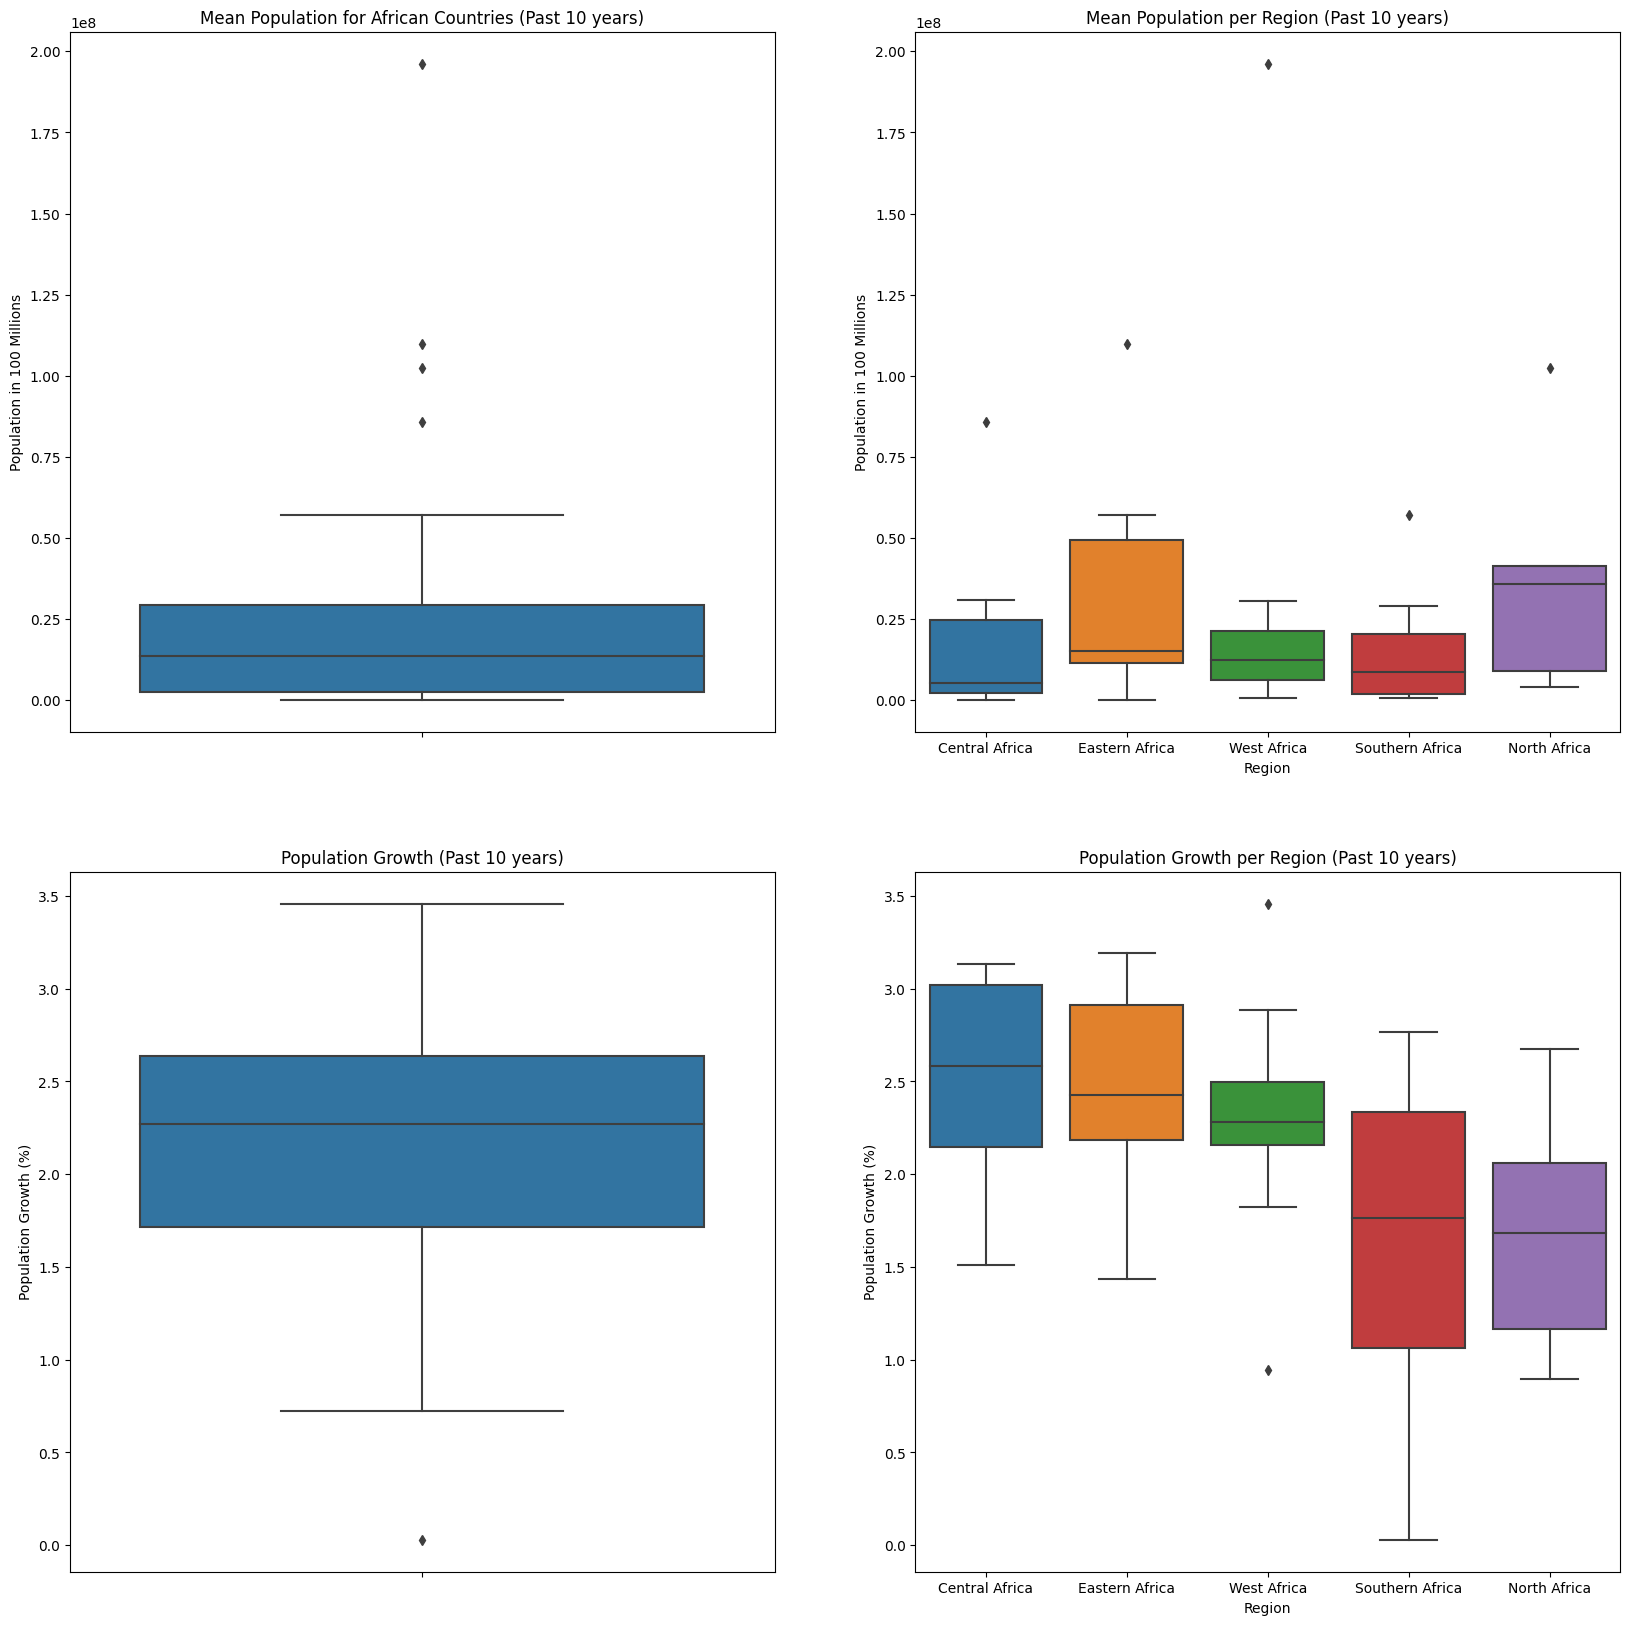

In [92]:
## Visualising Population Data
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.boxplot(y=data['MeanPopulation'])
plt.ylabel('Population in 100 Millions')
plt.title('Mean Population for African Countries (Past 10 years)')

plt.subplot(2,2,2)
sns.boxplot(y=data['MeanPopulation'], x=data['Region'])
plt.ylabel('Population in 100 Millions')
plt.title('Mean Population per Region (Past 10 years)')

plt.subplot(2,2,3)
sns.boxplot(y=data['PopulationGrowth'])
plt.ylabel('Population Growth (%)')
plt.title('Population Growth (Past 10 years)')

plt.subplot(2,2,4)
sns.boxplot(y=data['PopulationGrowth'], x=data['Region'])
plt.ylabel('Population Growth (%)')
plt.title('Population Growth per Region (Past 10 years)')

plt.show()

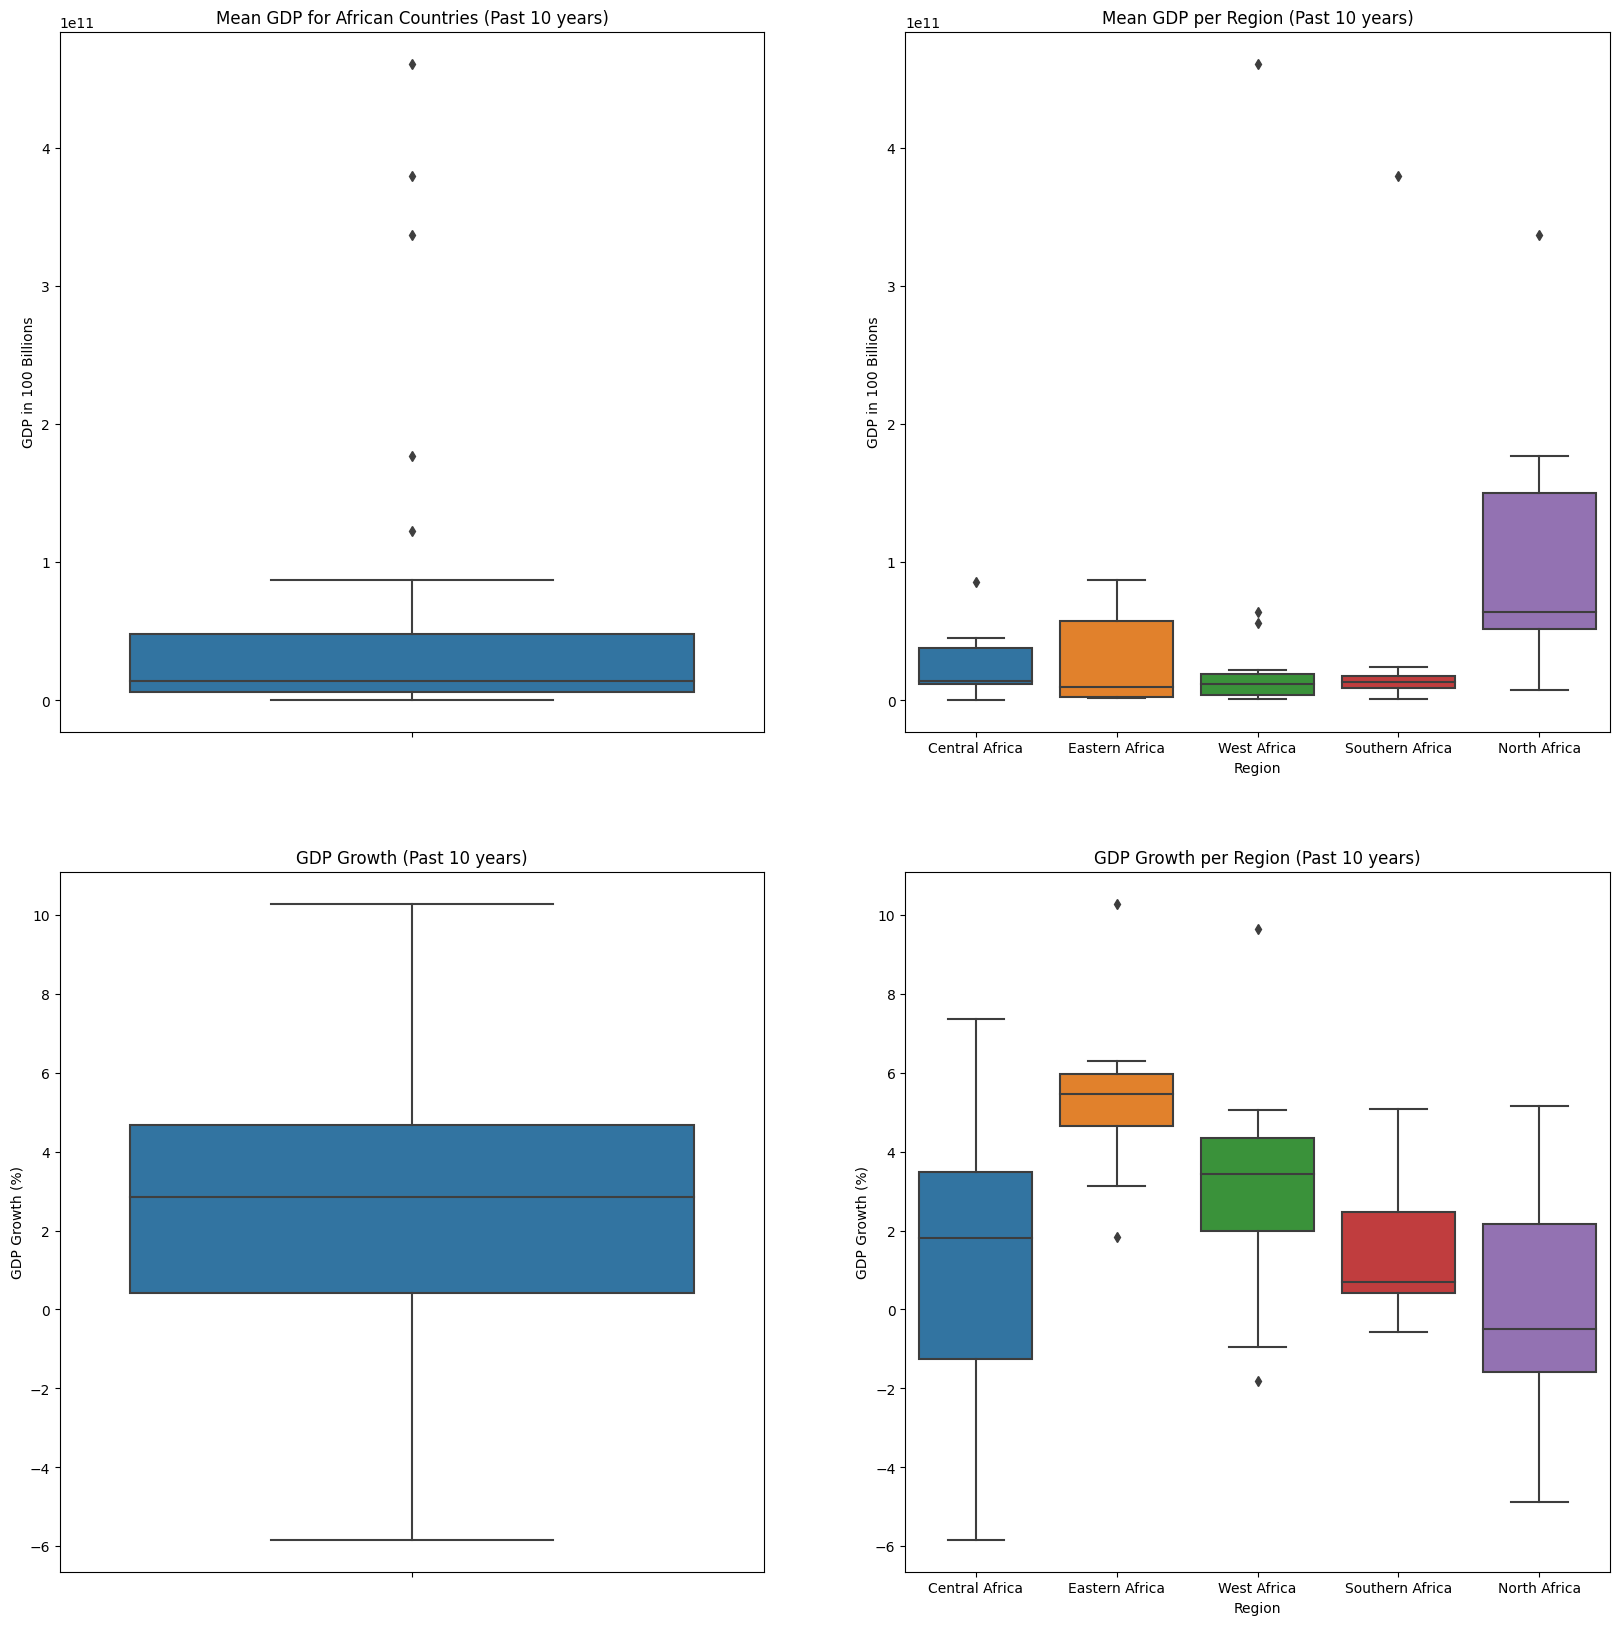

In [93]:
## Visualising GDP Data
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.boxplot(y=data['MeanGDP'])
plt.ylabel('GDP in 100 Billions')
plt.title('Mean GDP for African Countries (Past 10 years)')

plt.subplot(2,2,2)
sns.boxplot(y=data['MeanGDP'], x=data['Region'])
plt.ylabel('GDP in 100 Billions')
plt.title('Mean GDP per Region (Past 10 years)')

plt.subplot(2,2,3)
sns.boxplot(y=data['GDPGrowth'])
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth (Past 10 years)')

plt.subplot(2,2,4)
sns.boxplot(y=data['GDPGrowth'], x=data['Region'])
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth per Region (Past 10 years)')

plt.show()

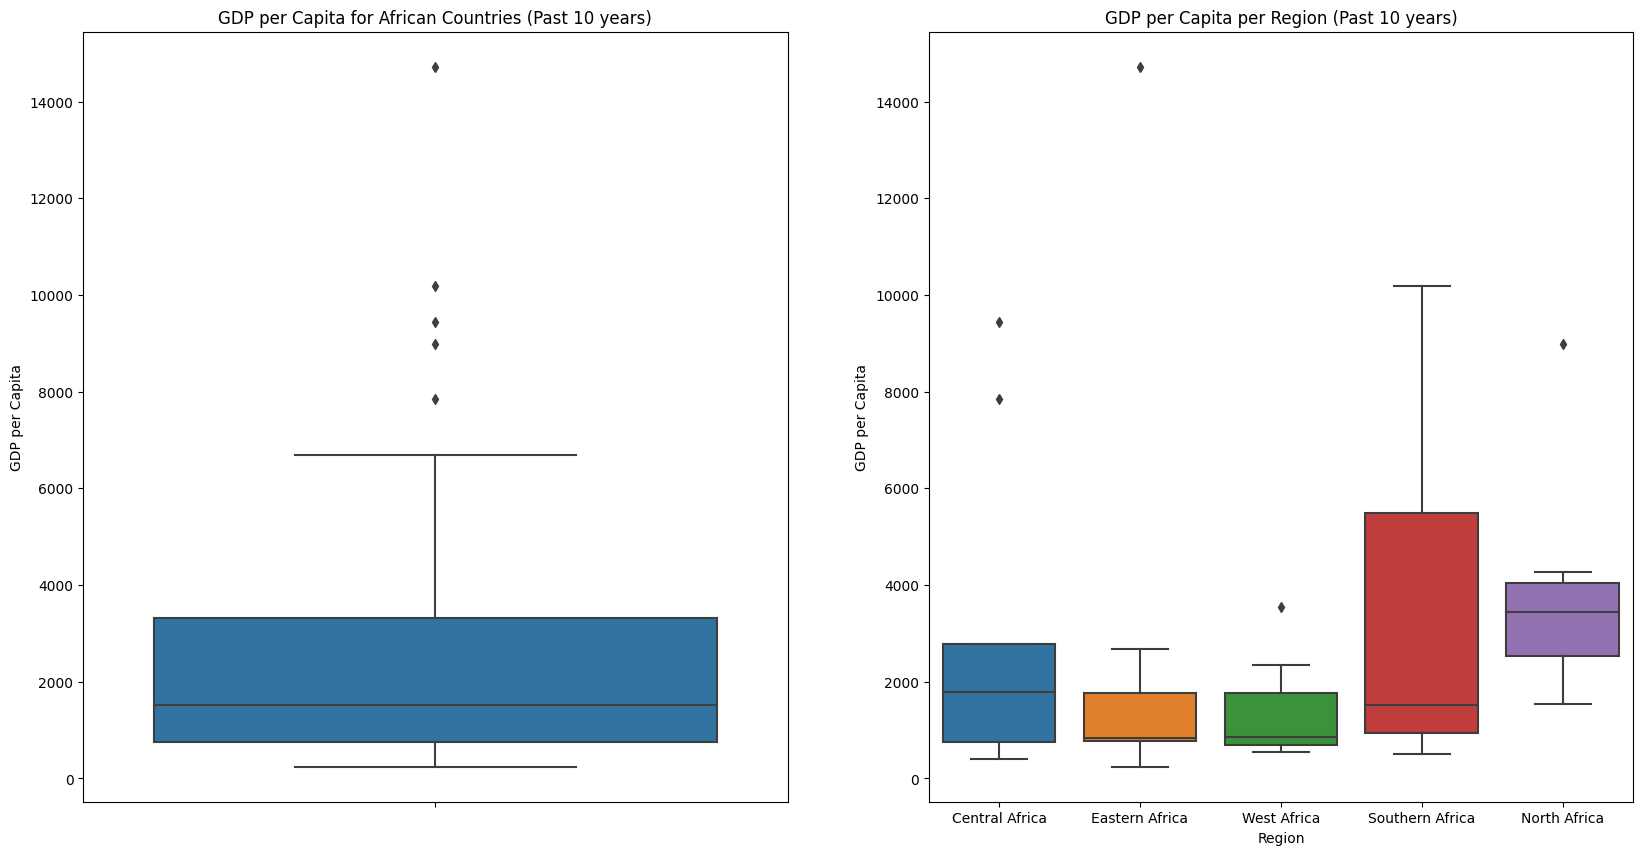

In [94]:
## Visualising GDP per Capita Data
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.boxplot(y=data['GDPperCapita'])
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita for African Countries (Past 10 years)')

plt.subplot(1,2,2)
sns.boxplot(y=data['GDPperCapita'], x=data['Region'])
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita per Region (Past 10 years)')

plt.show()

### Bivariate Analysis

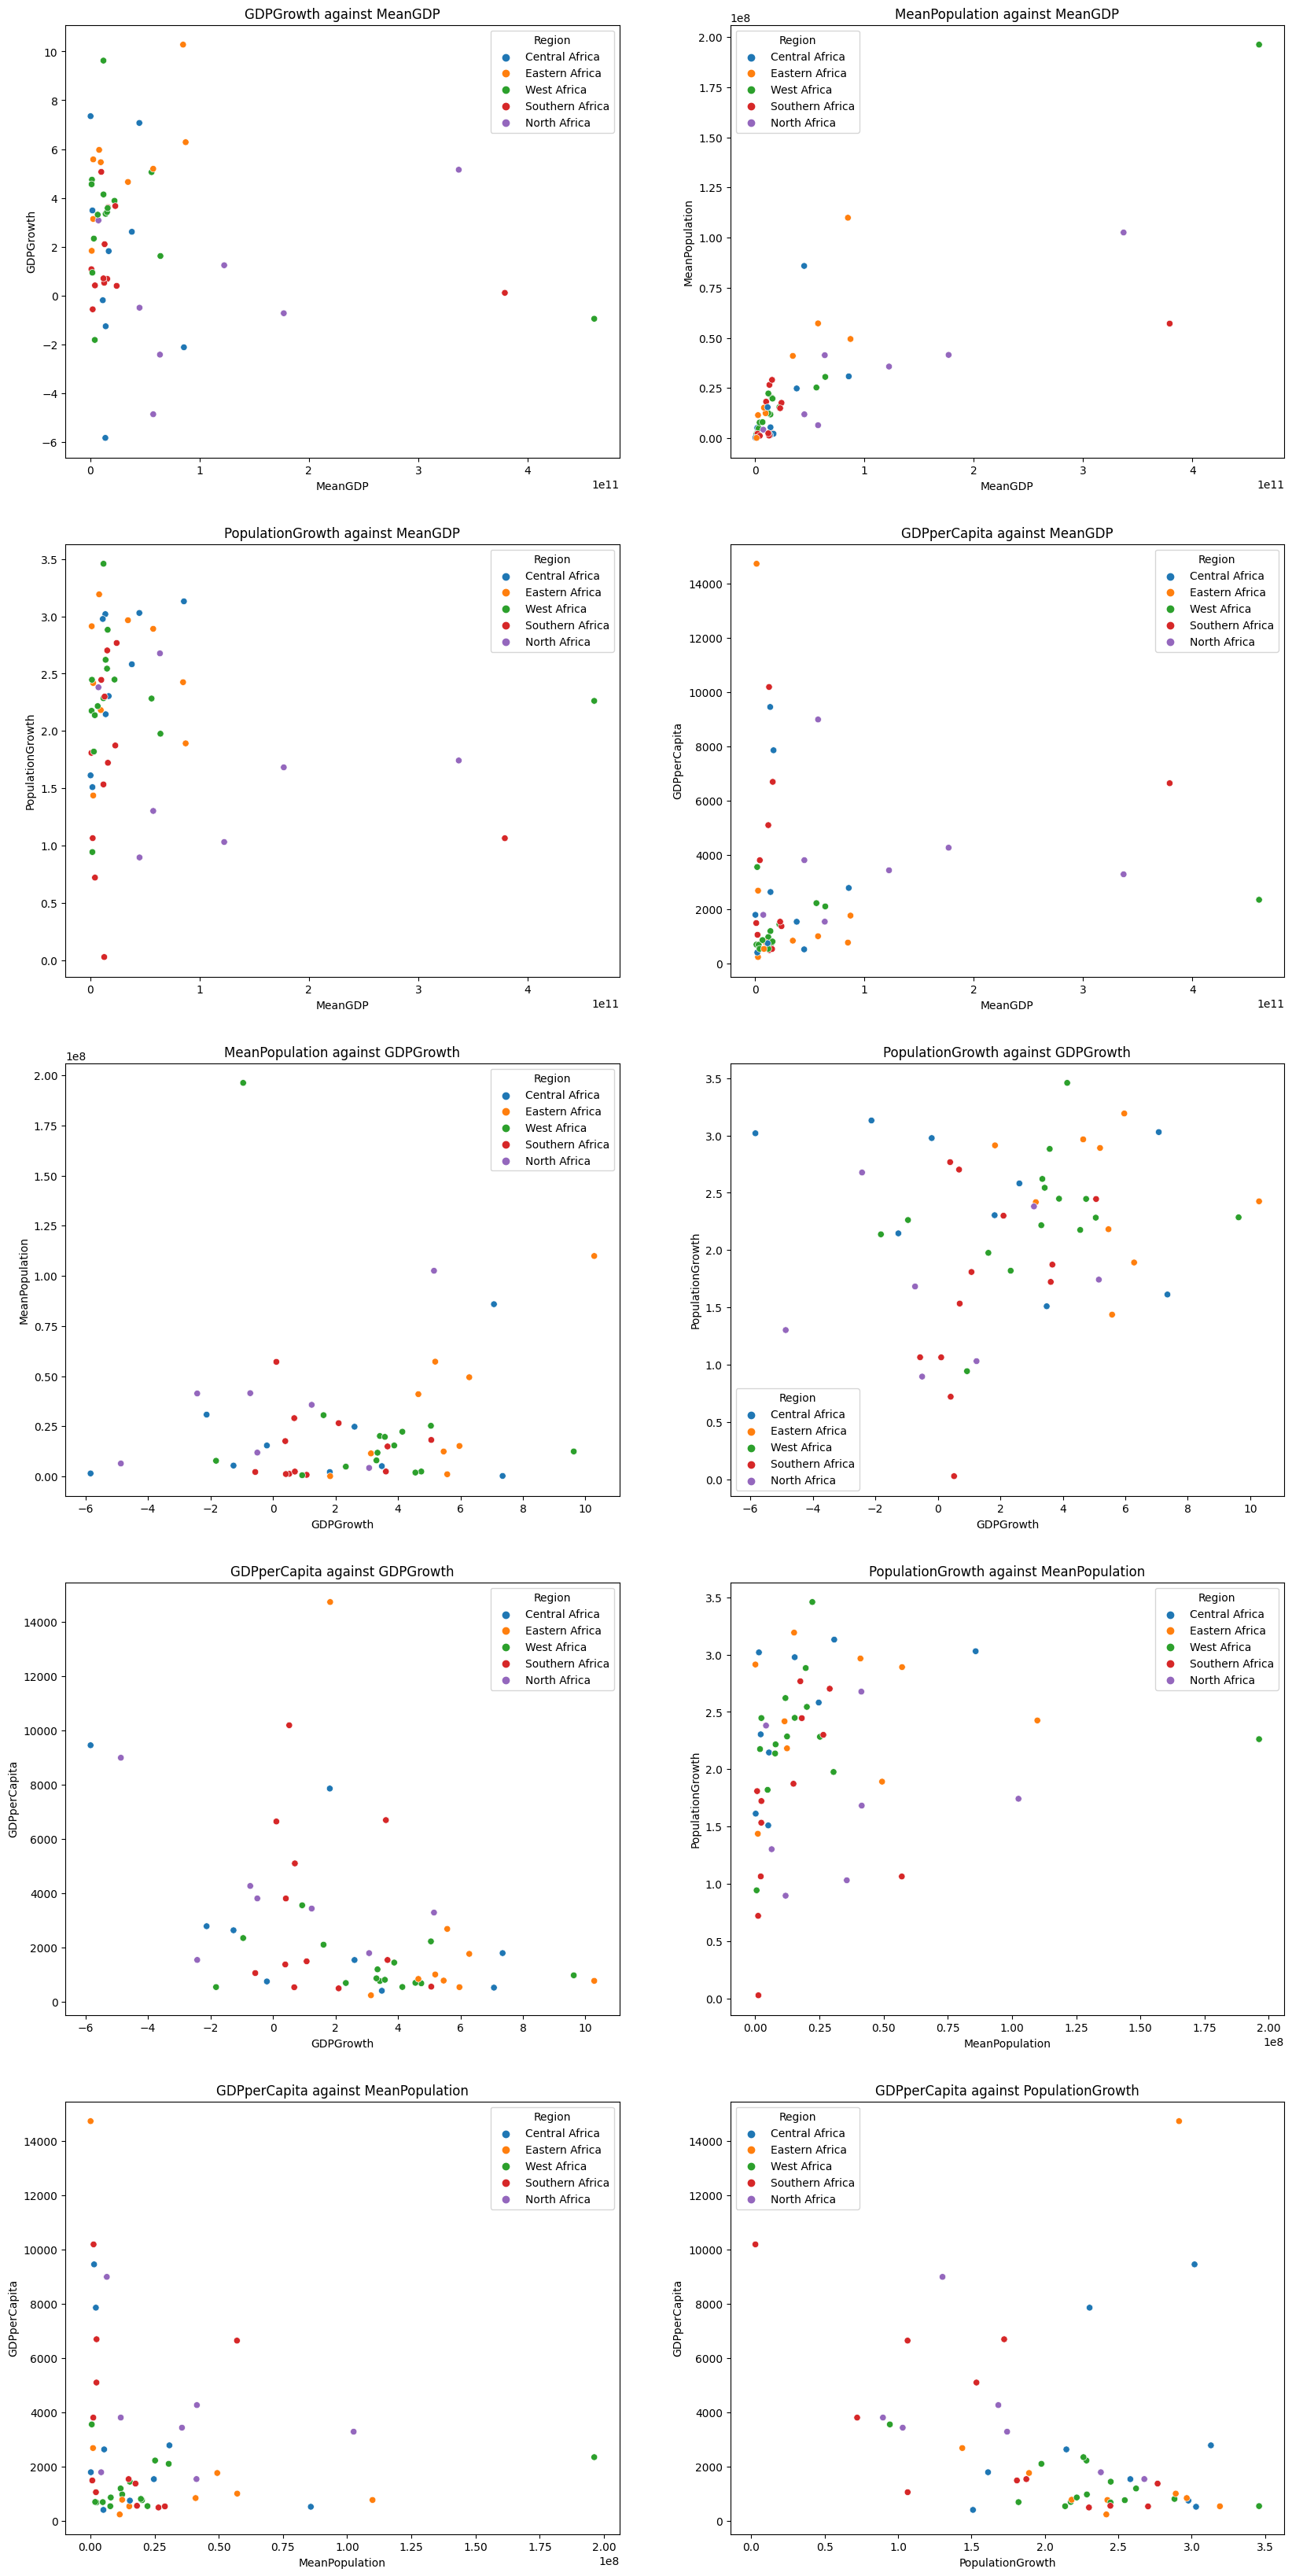

In [103]:
visual_cols = ['MeanGDP', 'GDPGrowth', 'MeanPopulation', 'PopulationGrowth', 'GDPperCapita']
subplot_cols = 2
plt.figure(figsize=(20,50))
subplot_rows, counter = (math.comb(len(visual_cols),2)//subplot_cols) + 1, 0

while len(visual_cols) > 1:
    for j in range(1,len(visual_cols)):
        counter += 1
        plt.subplot(subplot_rows, subplot_cols, counter)
        sns.scatterplot(x=data[visual_cols[0]],y=data[visual_cols[j]], hue=data['Region'])
        plt.title(f"{visual_cols[j]} against {visual_cols[0]}")
        plt.xlabel(f'{visual_cols[0]}')
        plt.ylabel(f'{visual_cols[j]}')
    visual_cols = visual_cols[1:]

plt.show()